In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
import os
from data_processing import get_SensorData, my_pca, series_to_supervised, lstm_sampling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error
import xgboost as xgb

today = datetime.date.today()

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
input_path = './input_data'
file = os.path.join(input_path,'sensors.csv')
target_file = os.path.join(input_path,'coke_target.csv')

In [3]:
# Считываем данные из файлов, нормализуем и применяем метод главных комполнентов
X, y, submit_X, mean_y, std_y = get_SensorData(file, target_file, nc=None, norm=False)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


No PCA transformation


In [4]:
k = X[X.columns.values[1:]].lt(0).apply(lambda x: x.sum())
k=k[k>0]

In [5]:
len(y["target"])

10400

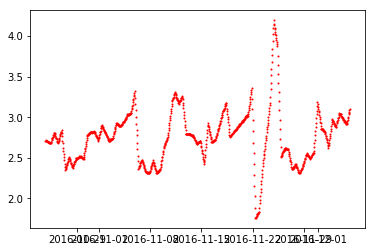

In [7]:
plt.plot(X.index[:1000], y["target"][:1000], 'ro', markersize=1)
#plt.axis([0, 6, 0, 20])
plt.show()

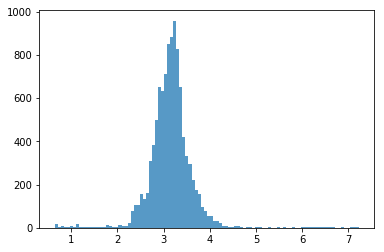

In [8]:
n, bins, patches = plt.hist(y["target"], alpha=0.75, bins=100)

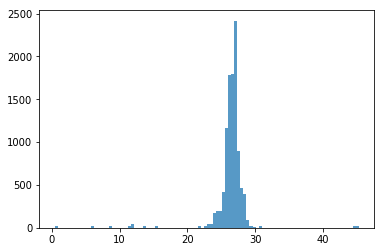

In [9]:
n, bins, patches = plt.hist(X[X.columns.values[2]], alpha=0.75, bins=100)

f_1


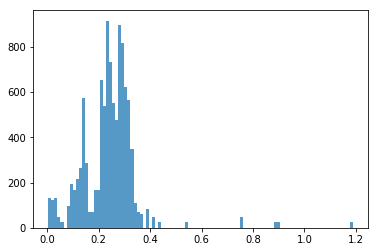

f_2


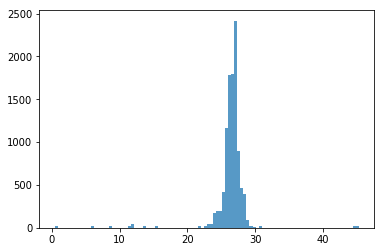

f_3


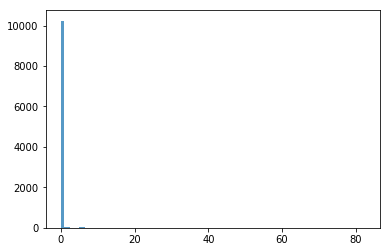

f_4


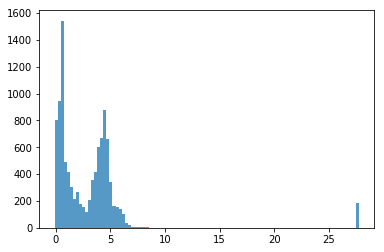

f_5


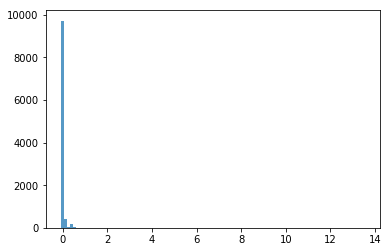

f_6


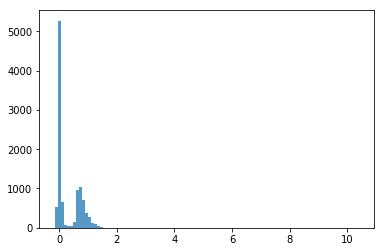

f_7


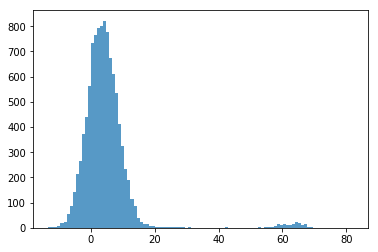

f_8


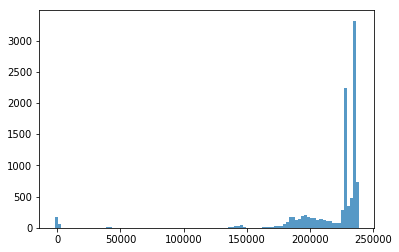

f_9


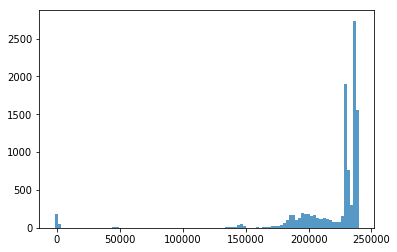

f_10


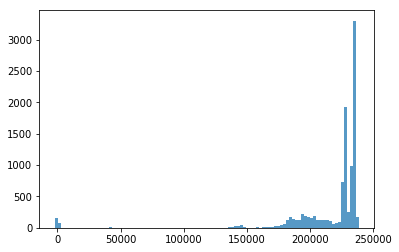

f_11


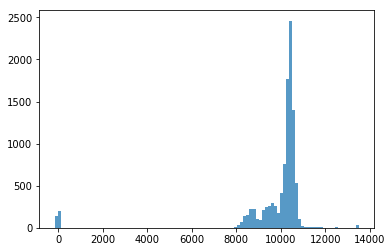

f_12


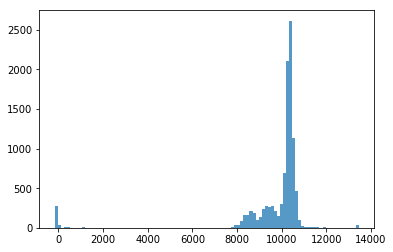

f_13


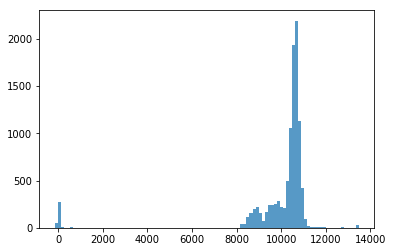

f_14


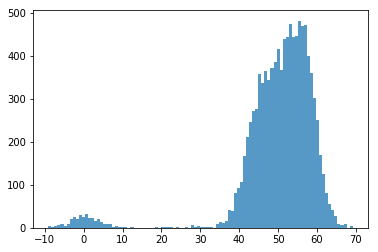

f_15


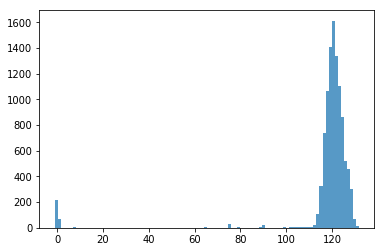

f_16


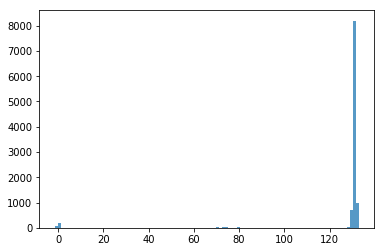

f_17


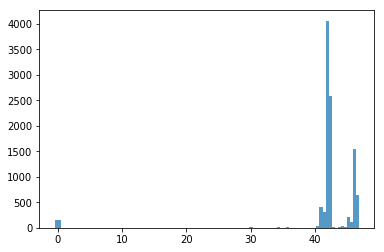

f_18


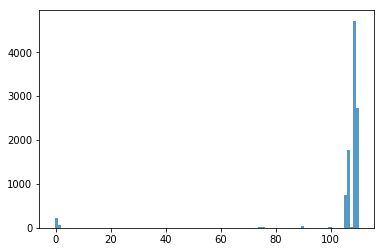

f_19


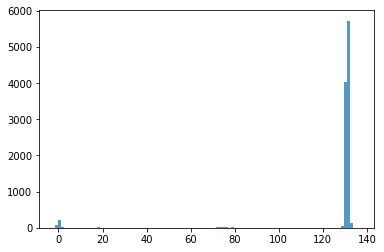

f_20


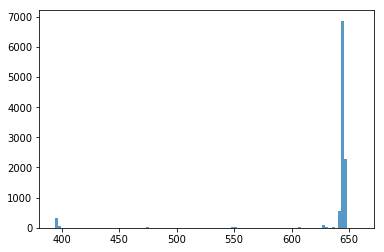

f_21


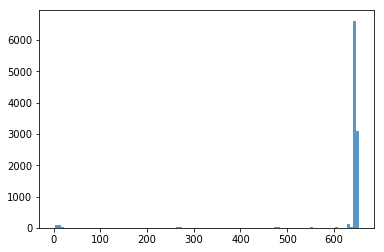

f_22


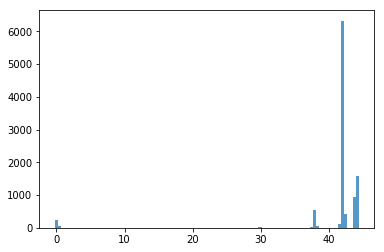

f_23


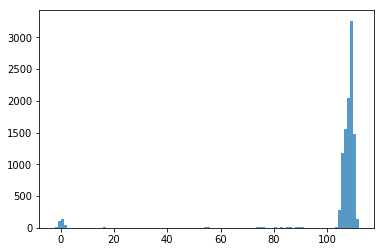

f_24


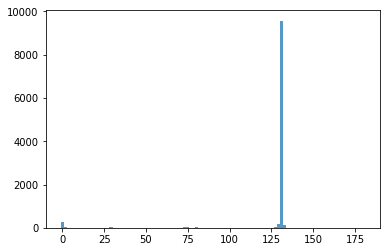

f_25


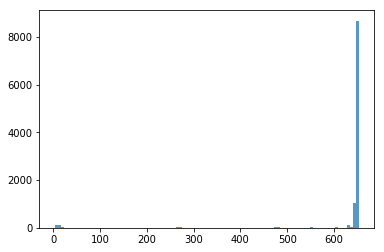

f_26


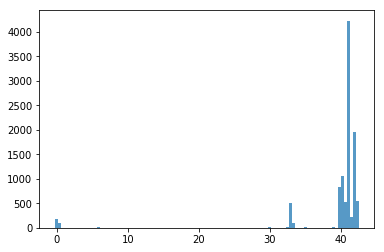

f_27


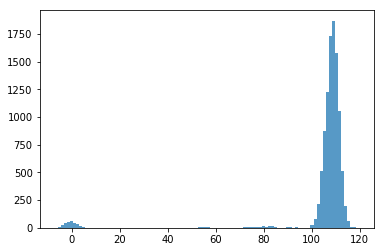

f_28


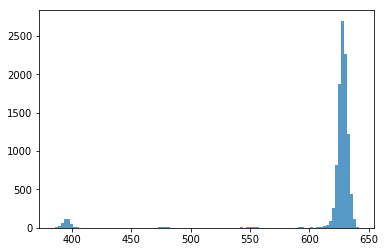

f_29


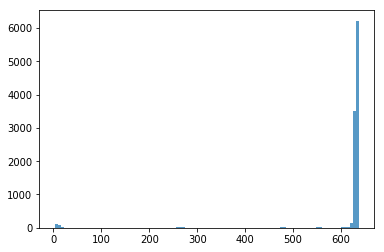

f_30


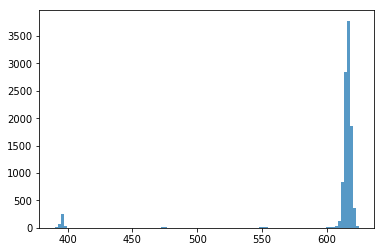

f_31


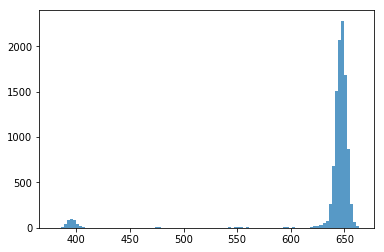

f_32


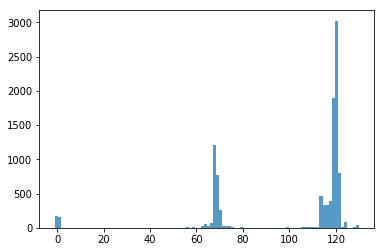

f_33


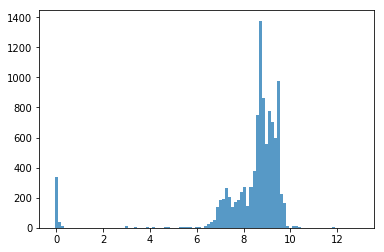

f_34


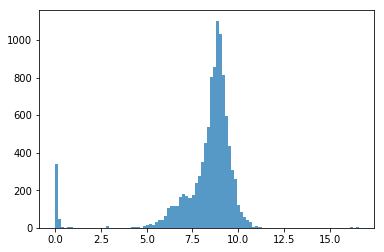

f_35


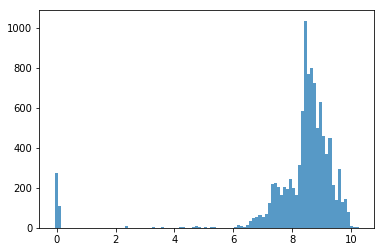

f_36


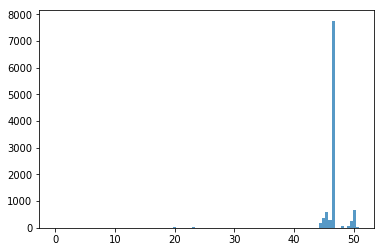

f_37


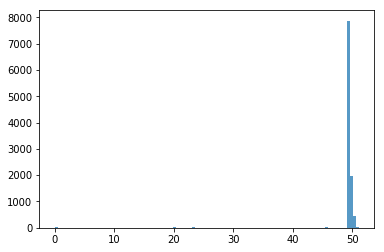

f_38


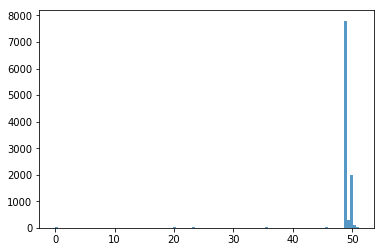

f_39


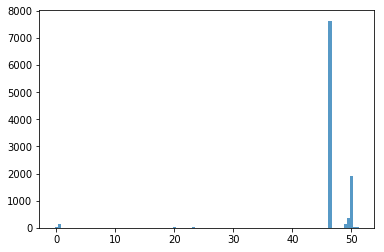

f_40


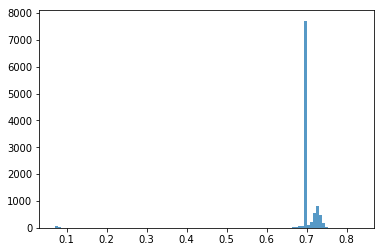

f_41


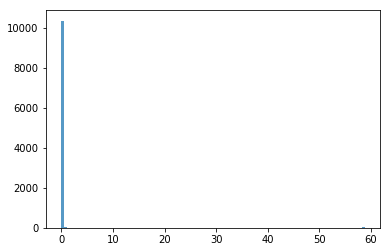

f_42


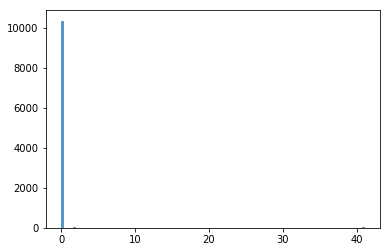

f_43


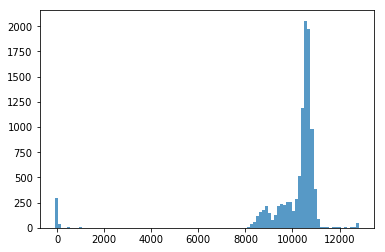

f_44


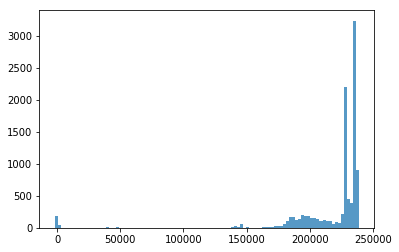

f_45


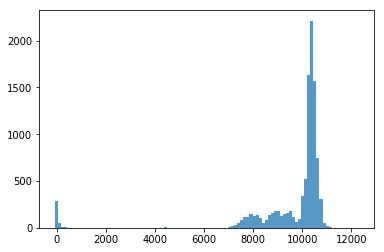

f_46


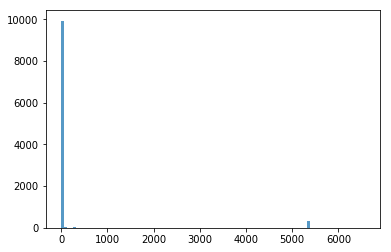

f_47


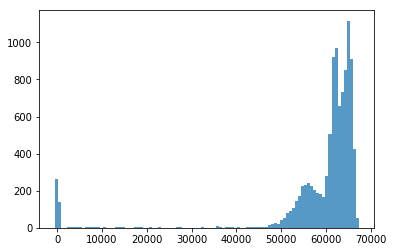

In [10]:
for i in range(1,X.shape[1]):
    n, bins, patches = plt.hist(X[X.columns.values[i]], alpha=0.75, bins=100)
    print(X.columns.values[i])
    plt.show()

In [11]:
data = X[X.columns.values[1:]]
correlations = data.corrwith(y["target"])

In [12]:
correlations*100

f_1    NaN
f_2    NaN
f_3    NaN
f_4    NaN
f_5    NaN
f_6    NaN
f_7    NaN
f_8    NaN
f_9    NaN
f_10   NaN
f_11   NaN
f_12   NaN
f_13   NaN
f_14   NaN
f_15   NaN
f_16   NaN
f_17   NaN
f_18   NaN
f_19   NaN
f_20   NaN
f_21   NaN
f_22   NaN
f_23   NaN
f_24   NaN
f_25   NaN
f_26   NaN
f_27   NaN
f_28   NaN
f_29   NaN
f_30   NaN
f_31   NaN
f_32   NaN
f_33   NaN
f_34   NaN
f_35   NaN
f_36   NaN
f_37   NaN
f_38   NaN
f_39   NaN
f_40   NaN
f_41   NaN
f_42   NaN
f_43   NaN
f_44   NaN
f_45   NaN
f_46   NaN
f_47   NaN
dtype: float64

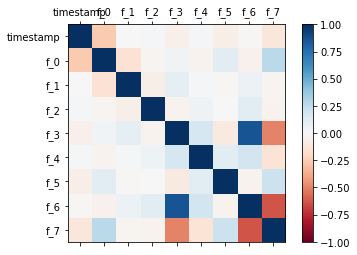

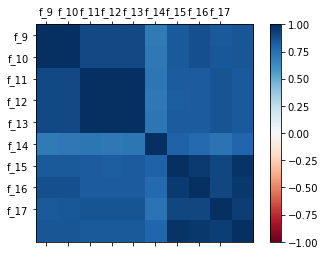

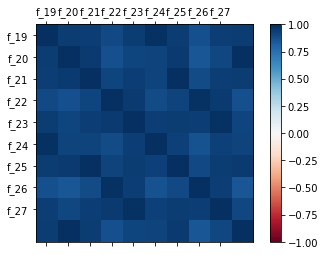

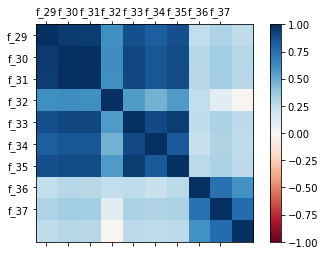

In [12]:
for k in range(4):
    data = X[X.columns.values[k*10:(k+1)*10]]
    names = data.columns.values
    correlations = data.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='RdBu')
    fig.colorbar(cax)
    ticks = np.arange(0,9,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

In [11]:
# Считываем данные из файлов, нормализуем и применяем метод главных комполнентов
X, y, submit_X, mean_y, std_y = get_SensorData(file, target_file, nc=None, norm=True)

1


In [12]:
X.head(2)

,timestamp,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47
0,2016-10-24 16:00:00,0.0,0.0,0.0,-0.058457,2.019612,0.001457,1.357428,0.839728,0.546688,...,0.0,0.0,0.0,0.0,0.0,0.264008,0.515893,0.304784,-0.090717,0.507526
1,2016-10-24 17:00:00,0.0,0.0,0.0,0.025528,2.122337,-0.039432,1.107915,1.052333,0.561111,...,0.0,0.0,0.0,0.0,0.0,0.270158,0.536315,0.257334,-0.006790,0.519427


In [13]:
fig = plt.gcf()
fig.set_size_inches(21,18)

<Figure size 1512x1296 with 0 Axes>

In [14]:
n = int(X.shape[1]/2)

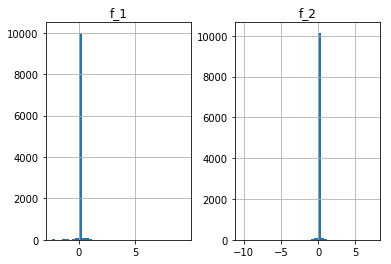

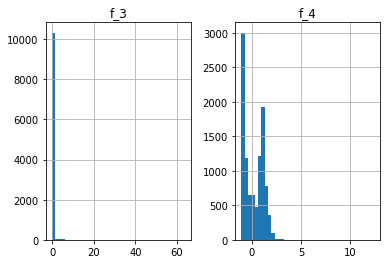

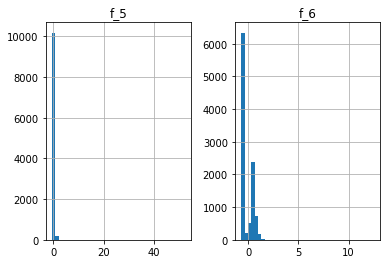

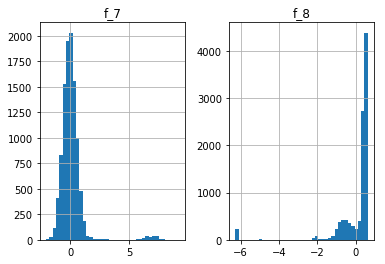

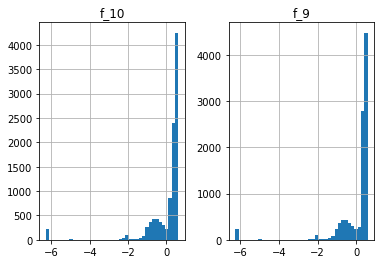

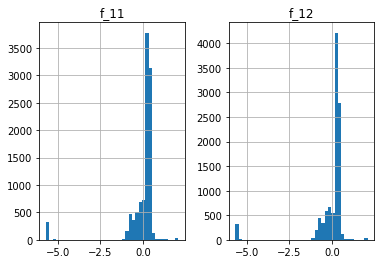

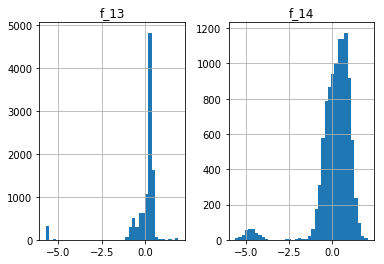

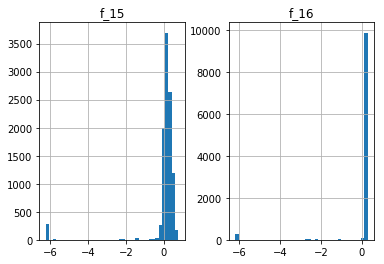

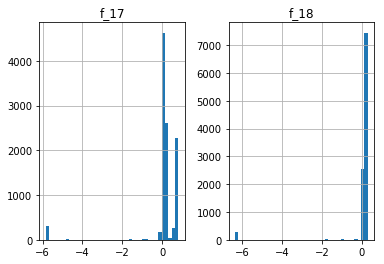

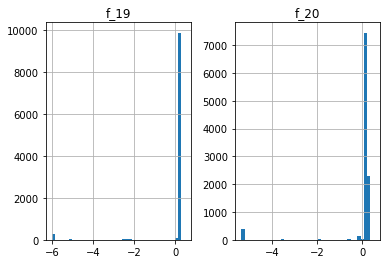

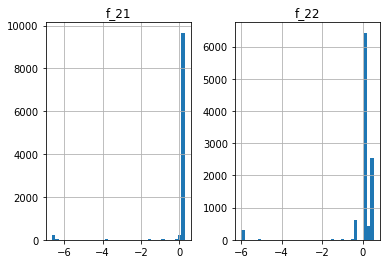

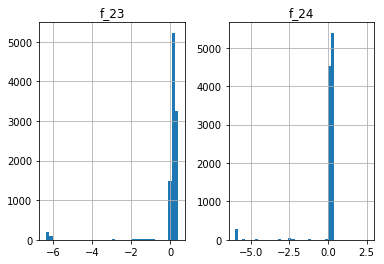

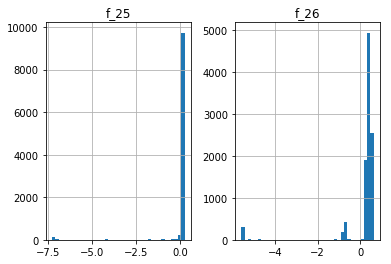

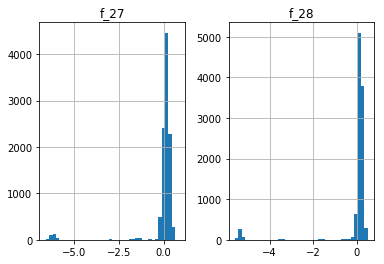

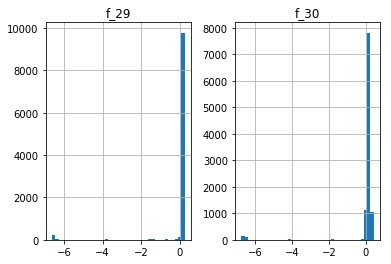

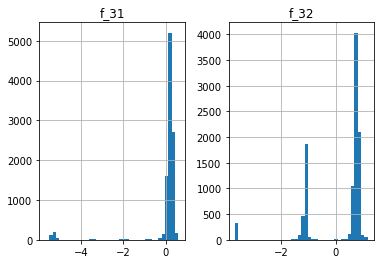

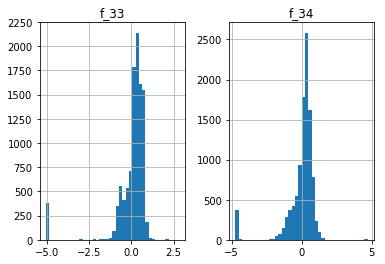

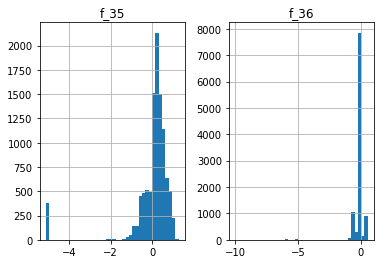

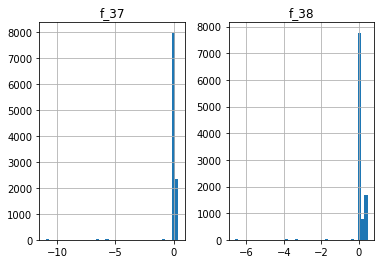

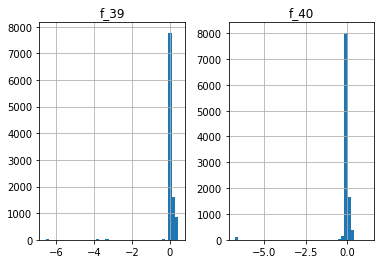

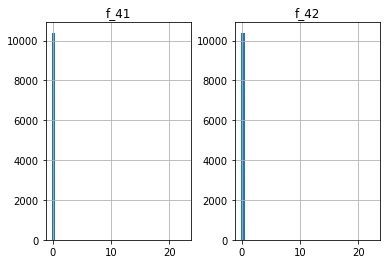

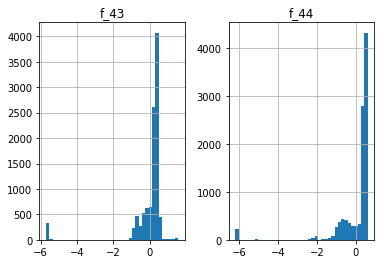

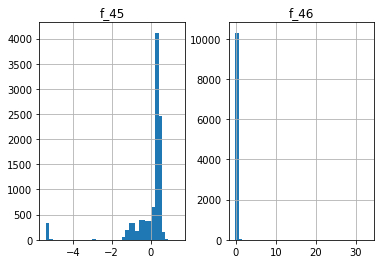

In [15]:
for i in range(1,n):
    X[X.columns.values[2*i:2*i+2]].hist(layout=(1,2), sharex=False, bins=40)
    plt.show()